In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from qupath_filter_viz_functions import coordFilter, channelFilter, clusterFilter, stackedBar, imageMask, emptyMatrixViz

In [2]:
df = pd.read_csv('test files\hdb_results.csv')
df = df.sort_values(by='ratio_red',ascending=False)

In [18]:
#cluster =-1 is noise
#return 10 bigegst clusters 
pivot = df.groupby('c_label').count().sort_values(by='cell_index',ascending=False)
pivot[['cell_index']].head(11)

cell_index
c_label            
-1.0           1607
 58.0           303
 14.0           270
 49.0           245
 45.0           158
 29.0           158
 37.0            77
 51.0            73
 21.0            44
 50.0            39
 71.0            38

In [19]:
#use clusterFilter to add bool_column
df = clusterFilter(df,[58])

In [24]:
df[df['cluster_bool']=='Y'].head()

cell_index  centroid_x  centroid_y  channel_nucleus  nucleus_area  \
4796  cell_3488        1503        1443       20663.4473         71.64   
4932  cell_2072        2279         876       35229.4062        108.00   
4992  cell_2009        2299         851       37563.7930         63.36   
5003  cell_2869        1823        1186       30914.3633         95.04   
5009  cell_3857        2240        1591       14372.1934         32.76   

      nucleus_circularity  channel_red  channel_green  channel_blue  \
4796               0.8775    3288.1758      7874.4824    16979.1309   
4932               0.6815    2755.2139      7545.3423    15202.7373   
4992               0.6435    2843.7056      8241.4004    16314.3838   
5003               0.8895    2519.3296      7945.7114    13938.4229   
5009               0.8773    3357.1074      9915.7100    19302.9785   

      channel_sum  ...  ratio_blue    rgb_red  rgb_green    rgb_blue  \
4796   28141.7891  ...    0.603342  29.795008  71.352713  153.852279   
4932   25503.2935  ...    0.596109  27.548581  75.443679  152.007740   
4992   27399.4898  ...    0.595427  26.465636  76.700593  151.833771   
5003   24403.4639  ...    0.571166  26.325322  83.027410  145.647268   
5009   32575.7959  ...    0.592556  26.279094  77.619164  151.101742   

       rel_red  rel_green  rel_blue  c_label  c_probability  cluster_bool  
4796  0.050489   0.127250  0.259127     58.0       0.808290             Y  
4932  0.042305   0.121931  0.232017     58.0       0.989152             Y  
4992  0.043664   0.133180  0.248982     58.0       0.898267             Y  
5003  0.038683   0.128401  0.212721     58.0       0.846930             Y  
5009  0.051547   0.160236  0.294592     58.0       0.895324             Y  

[5 rows x 22 columns]

In [22]:
#show cluster 58 cells in stacked bar of all cells
#show cluster 58 cells only
stackedBar(df,True,'cluster_bool')
stackedBar(df[df['cluster_bool']=='Y'],False,'cluster_bool')

Loading BokehJS ...

Loading BokehJS ...

100%|███████████████████████████████████████████████████████████████████████████████| 303/303 [00:00<00:00, 704.91it/s]


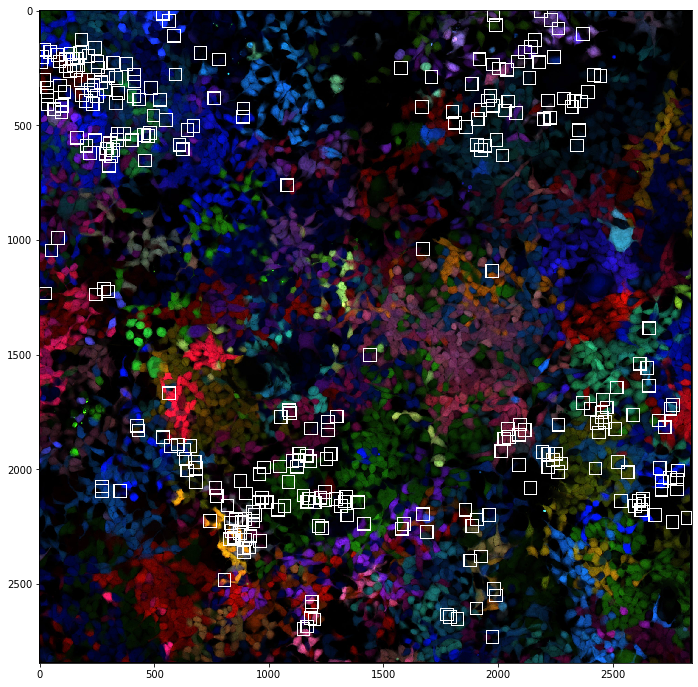

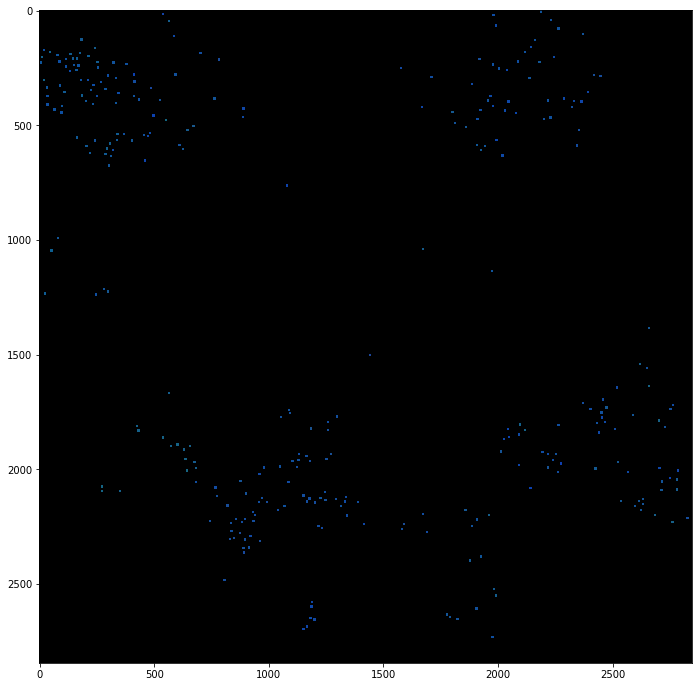

In [23]:
#show cluster 58 cells on masked image and RGB blocked on empty matrix

image = np.array(Image.open('test files\detected_image.jpg'))
imageMask(image,df[df['cluster_bool']=='Y'])

emptyMatrixViz(df[df['cluster_bool']=='Y'])

In [25]:
#use channelFilter to add bool_column
df = channelFilter(df)

Enter "and" for conjunction or "or" for disjunction of parameters: and
red filter: 0.8 1
green filter: 0 1
blue filter: 0 1


In [27]:
stackedBar(df,True,'channel_bool')

Loading BokehJS ...

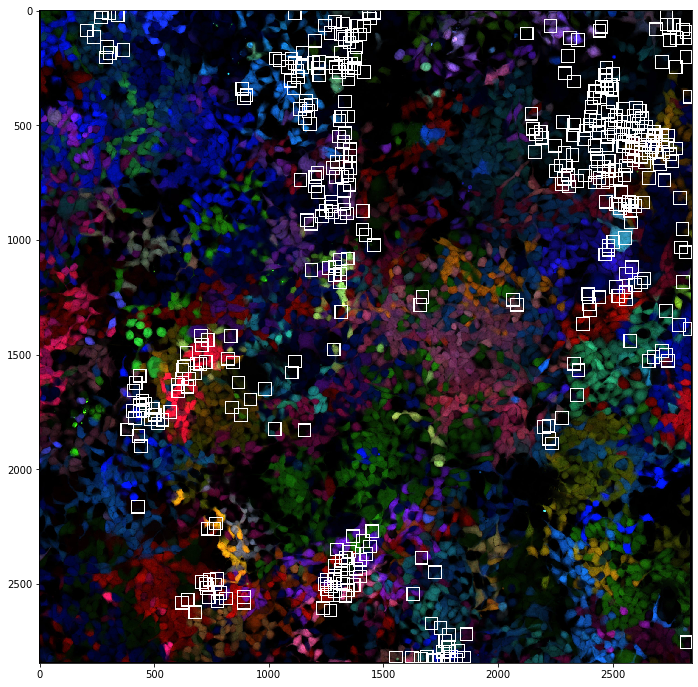

In [28]:
#show masked image of cells where red channel > 0.8
image = np.array(Image.open('test files\detected_image.jpg'))
imageMask(image,df[df['channel_bool']=='Y'])

In [33]:
#return stackedBar of 5 biggest clusters
#stability is very promising. but 75 clusters is probably too many.
#can increase minimum cluster size to reduce number

for cluster in pivot.index[1:6]:
    df = clusterFilter(df,[cluster])
    stackedBar(df[df['cluster_bool']=='Y'],False,'cluster_bool')

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...